In [1]:
import pandas as pd

In [169]:
from ddf_utils.str import format_float_digits

In [35]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
seaborn.set_context('notebook')
seaborn.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
synonyms = pd.read_csv('../source/fixtures/ddf--open_numbers/ddf--synonyms--geo.csv')
wb_groups = pd.read_csv('../source/fixtures/wb_income_groups.csv')

In [3]:
syn_mapping = synonyms.set_index('synonym')['geo'].to_dict()

In [13]:
geo = pd.read_csv('../../ddf--entities--geo.csv')

In [14]:
geo['geonew'] = geo['name'].map(syn_mapping)
geo_mapping = geo.set_index('geo')['geonew'].to_dict()

In [104]:
df = pd.read_csv('../../ddf--datapoints--population_smooth--by--geo--year--income_bracket.csv')

In [59]:
df

,geo,year,income_bracket,population_smooth
0,ago,1981,0,149.987968
1,ago,1981,1,215.251967
2,ago,1981,2,293.397006
3,ago,1981,3,393.662631
4,ago,1981,4,523.259277
...,...,...,...,...
640895,zwe,2019,95,15.984335
640896,zwe,2019,96,10.732241
640897,zwe,2019,97,6.985642
640898,zwe,2019,98,4.388537


In [68]:
df['geo'] = df['geo'].map(geo_mapping)

In [61]:
df['geo'].hasnans

False

In [26]:
def groups_over_time(df, col):
    df_copy = df.copy()
    df_copy['newindex'] = df['geo'] + '-' + df['time'].astype(str)
    return df_copy.set_index('newindex')[col].to_dict()

In [28]:
wb_mapping = groups_over_time(wb_groups, "WB's 4 income levels")

In [29]:
def translate_with_time_series(df: pd.DataFrame, mapping, newcol):
    df_copy = df.copy()
    df_copy['newindex'] = df['geo'] + '-' + df['year'].astype(str)
    df_copy[newcol] = df_copy['newindex'].map(mapping)
    return df_copy.drop(columns=['newindex'])

In [137]:
translate_with_time_series(df, wb_mapping, 'wb_income_group')

,geo,year,income_bracket,population_smooth,wb_income_group
0,ago,1981,0,149.987968,NaN
1,ago,1981,1,215.251967,NaN
2,ago,1981,2,293.397006,NaN
3,ago,1981,3,393.662631,NaN
4,ago,1981,4,523.259277,NaN
...,...,...,...,...,...
640895,zwe,2019,95,15.984335,Lower middle income
640896,zwe,2019,96,10.732241,Lower middle income
640897,zwe,2019,97,6.985642,Lower middle income
640898,zwe,2019,98,4.388537,Lower middle income


In [138]:
df2 = translate_with_time_series(df, wb_mapping, 'wb_income_group')

In [139]:
df2 = df2.dropna(how='any').drop(columns=['geo'])

In [140]:
df_wb = df2.groupby(by=['wb_income_group', 'year', 'income_bracket']).sum()

In [141]:
df_wb

population_smooth
wb_income_group     year income_bracket                   
High income         1987 0                    11550.411155
                         1                    15179.767809
                         2                    19127.774235
                         3                    23387.149725
                         4                    27906.202006
...                                                    ...
Upper middle income 2019 95                    2132.250156
                         96                    1583.434922
                         97                    1139.381923
                         98                     806.836286
                         99                     549.143452

[13200 rows x 1 columns]

<AxesSubplot:xlabel='income_bracket'>

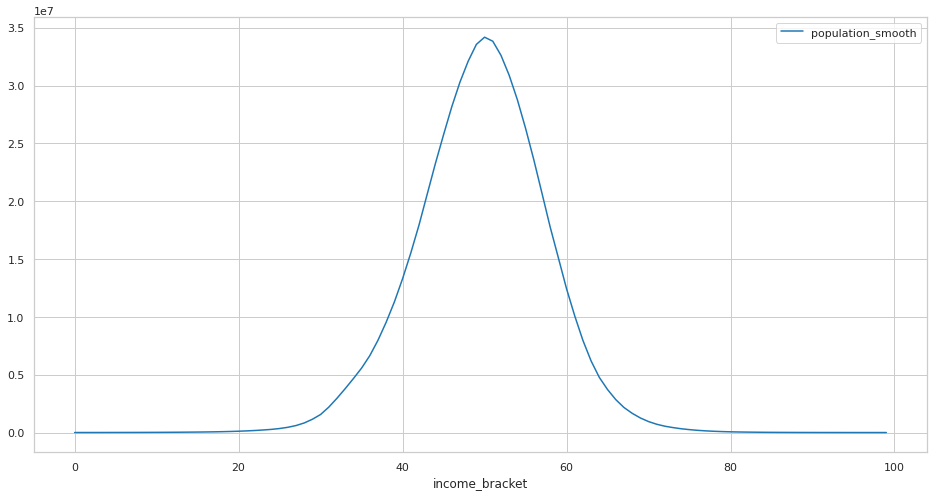

In [136]:
df_wb.loc[("Upper middle income", 2000)].plot()

In [55]:
df_wb.loc[("High income", 1987)].std()

population    1.713481e+07
dtype: float64

In [56]:
import sys
sys.path.append('../scripts')

In [57]:
import smoothlib

In [127]:
df_wb.loc[("Low income", 1987)]['population_smooth'].values

array([2.24089879e+04, 3.03061591e+04, 3.94722168e+04, 5.02367850e+04,
       6.25499071e+04, 7.39992121e+04, 8.64337366e+04, 1.01291558e+05,
       1.18239645e+05, 1.36638432e+05, 1.59663328e+05, 1.86844079e+05,
       2.18988892e+05, 2.60918205e+05, 3.12896242e+05, 3.78540122e+05,
       4.64259643e+05, 5.77912763e+05, 7.27582812e+05, 9.12171421e+05,
       1.17696600e+06, 1.55851904e+06, 2.15571527e+06, 3.09813454e+06,
       4.56824580e+06, 6.73922782e+06, 1.00025906e+07, 1.47115673e+07,
       2.15608566e+07, 3.04650972e+07, 4.32790458e+07, 5.89671717e+07,
       7.96270887e+07, 1.06721193e+08, 1.43617432e+08, 1.84588632e+08,
       2.22092103e+08, 2.49413816e+08, 2.61019635e+08, 2.56139447e+08,
       2.36840676e+08, 2.05391809e+08, 1.66970966e+08, 1.26581408e+08,
       9.16849745e+07, 6.75425847e+07, 4.81869073e+07, 3.52893452e+07,
       2.59965179e+07, 1.90630457e+07, 1.39526434e+07, 1.01433416e+07,
       7.27845215e+06, 5.19519765e+06, 3.73517236e+06, 2.73908175e+06,
      

<AxesSubplot:xlabel='income_bracket'>

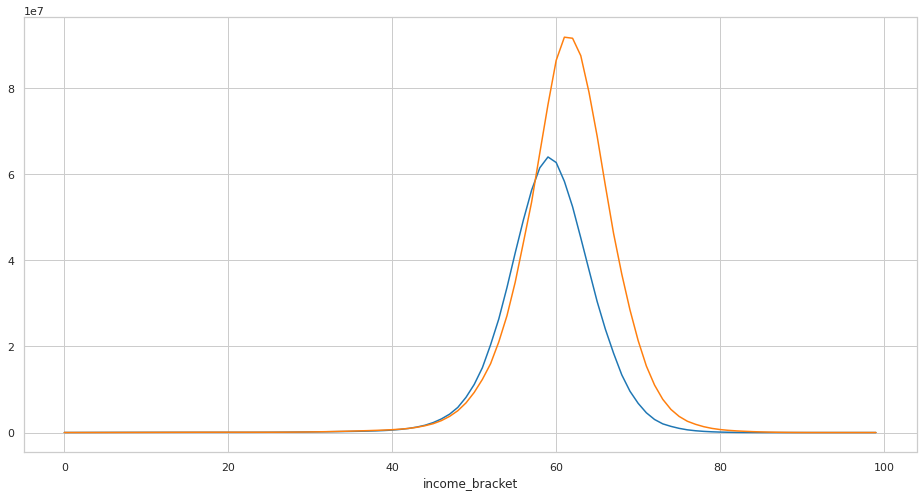

In [132]:
df_wb.loc[("High income", 1987)]['population_smooth'].plot()
df_wb.loc[("High income", 2018)]['population_smooth'].plot()

In [84]:
df_wb.loc[("High income", 1987)]['population'].values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.82649622e+05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.41661504e+04,
       1.11501616e+05, 0.00000000e+00, 2.00499701e+03, 1.33456843e+05,
       0.00000000e+00, 0.00000000e+00, 1.54146800e+04, 1.07782572e+05,
       3.59077314e+04, 2.38531534e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.30235739e+04, 4.42745147e+05, 0.00000000e+00, 8.38713845e+03,
       1.15302311e+05, 5.43087772e+04, 4.84544322e+05, 2.32642078e+05,
       6.56469695e+05, 1.49144988e+05, 9.25389690e+04, 2.97349199e+04,
       7.00440471e+05, 9.91905135e+05, 4.02800999e+05, 8.51544113e+05,
       1.21034831e+06, 1.82738030e+06, 3.15641739e+06, 3.14901296e+06,
       5.27533675e+06, 6.83419714e+06, 1.05251479e+07, 1.43671137e+07,
       1.94038624e+07, 2.65308512e+07, 3.35921353e+07, 4.26112291e+07,
      

In [122]:
p = smoothlib.run_smooth(df_wb.loc[("High income", 1987)]['population_smooth'], 3, 0)


/home/semio/.pyvenv/gapminder/lib64/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/semio/.pyvenv/gapminder/lib64/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/semio/.pyvenv/gapminder/lib64/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/semio/.pyvenv/gapminder/lib64/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/semio/.pyvenv/gapminder/lib64/python3.9/site-packages/scipy/optimize/m

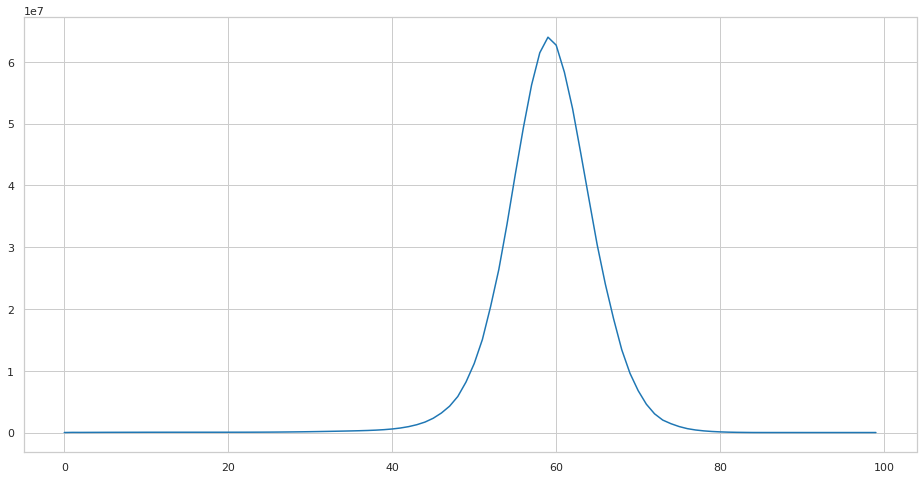

In [123]:
plt.plot(p)

In [124]:
p.values

array([6.78935692e-47, 2.28651486e+04, 1.88091267e+04, 2.30757830e+04,
       2.76465275e+04, 3.24250941e+04, 3.47992652e+04, 3.77977316e+04,
       4.03682189e+04, 4.22157453e+04, 4.51508869e+04, 4.60856201e+04,
       4.71947549e+04, 4.79787827e+04, 4.80202536e+04, 4.82633094e+04,
       4.83552210e+04, 4.84107596e+04, 4.84662983e+04, 4.84520703e+04,
       4.88891148e+04, 4.99715128e+04, 5.19765562e+04, 5.51927471e+04,
       6.00821382e+04, 6.69229635e+04, 7.61526309e+04, 8.78304378e+04,
       1.02096691e+05, 1.18253682e+05, 1.37428650e+05, 1.58412660e+05,
       1.81602923e+05, 2.06575390e+05, 2.32691267e+05, 2.60803509e+05,
       2.92864479e+05, 3.33432737e+05, 3.87908730e+05, 4.64594673e+05,
       5.75014802e+05, 7.32183373e+05, 9.55035791e+05, 1.26705319e+06,
       1.69354704e+06, 2.30990178e+06, 3.16055328e+06, 4.26549280e+06,
       5.83423108e+06, 8.17243401e+06, 1.11580710e+07, 1.50612336e+07,
       2.03879892e+07, 2.63699388e+07, 3.36980876e+07, 4.16969452e+07,
      

In [103]:
p.values

array([ 2.49495222e+004,  3.22763080e+004,  4.00158019e+004,
        4.80962063e+004,  5.65267340e+004,  6.19879054e+004,
        6.61562200e+004,  6.89491205e+004,  7.23645827e+004,
        7.23388482e+004,  7.12948754e+004,  6.93556070e+004,
        6.63565407e+004,  6.22352746e+004,  5.90174358e+004,
        5.67189060e+004,  5.43488577e+004,  5.18813628e+004,
        4.98289216e+004,  4.86397156e+004,  4.66117567e+004,
        4.64537223e+004,  4.86949750e+004,  5.35391021e+004,
        6.07117957e+004,  7.08890596e+004,  7.99150938e+004,
        9.31767614e+004,  1.09620246e+005,  1.33551348e+005,
        1.59179796e+005,  1.98070960e+005,  2.42425805e+005,
        2.85850097e+005,  3.30428682e+005,  3.81630256e+005,
        4.47052797e+005,  5.00686749e+005,  5.55949285e+005,
        6.18747182e+005,  7.38131024e+005,  8.74894794e+005,
        1.00028580e+006,  1.17529849e+006,  1.44600534e+006,
        1.89779018e+006,  2.44508907e+006,  3.37285813e+006,
        5.27530346e+006,

In [142]:
df_wb2 = df_wb.reset_index()

In [143]:
df_wb2['wb_income_group'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [144]:
df_wb2['wb_income_group'].replace?

Object `replace` not found.


In [146]:
df_wb2['wb_income_group'] = df_wb2['wb_income_group'].replace({'High income': 1, 'Low income': 4, 'Upper middle income': 2, 'Lower middle income': 3})

In [149]:
df_wb2 = df_wb2.sort_values(by=['wb_income_group', 'year', 'income_bracket'])

In [172]:
df_wb2['population_smooth'] = df_wb2['population_smooth'].astype(int)

In [173]:
df_wb2.to_csv('../../ddf--datapoints--population_smooth--by--wb_income_group--year--income_bracket.csv', index=False)

In [181]:
df_wb3 = df_wb2.set_index(['wb_income_group', 'year', 'income_bracket']).groupby(['wb_income_group', 'year'], as_index=True).apply(lambda x: x / x.sum())

In [182]:
df_wb3.columns = ['population_percentage_smooth']
df_wb3['population_percentage_smooth'] = df_wb3['population_percentage_smooth'].map(format_float_digits)

In [183]:
df_wb3.to_csv('../../ddf--datapoints--population_percentage_smooth--by--wb_income_group--year--income_bracket.csv')

In [151]:
west_and_rest = pd.read_csv('../source/fixtures/west_and_rest.csv')

In [152]:
wr_mapping = west_and_rest.set_index('geo')['geo.gm_west_rest'].to_dict()

In [154]:
df_wr = df.copy()

In [155]:
df_wr['west_and_rest'] = df_wr['geo'].map(wr_mapping)

In [156]:
df_wr

,geo,year,income_bracket,population_smooth,west_and_rest
0,ago,1981,0,149.987968,rest
1,ago,1981,1,215.251967,rest
2,ago,1981,2,293.397006,rest
3,ago,1981,3,393.662631,rest
4,ago,1981,4,523.259277,rest
...,...,...,...,...,...
640895,zwe,2019,95,15.984335,rest
640896,zwe,2019,96,10.732241,rest
640897,zwe,2019,97,6.985642,rest
640898,zwe,2019,98,4.388537,rest


In [158]:
df_wr_sum = df_wr.drop(columns=['geo']).groupby(['west_and_rest', 'year', 'income_bracket']).sum()

In [159]:
df_wr_sum = df_wr_sum.reset_index()
df_wr_sum['west_and_rest'] = df_wr_sum['west_and_rest'].replace({'west': 1, 'rest': 2})

In [170]:
df_wr_sum['population_smooth'] = df_wr_sum['population_smooth'].astype(int)

In [171]:
df_wr_sum.sort_values(by=['west_and_rest', 'year', 'income_bracket']).to_csv('../../ddf--datapoints--population_smooth--by--west_and_rest--year--income_bracket.csv', index=False)

In [190]:
df_wr2 = df_wr_sum.set_index(['west_and_rest', 'year', 'income_bracket']).groupby(['west_and_rest', 'year'], as_index=True).apply(lambda x: x / x.sum())

In [192]:
df_wr2.columns = ['population_percentage_smooth']
df_wr2['population_percentage_smooth'] = df_wr2['population_percentage_smooth'].map(format_float_digits)

In [193]:
df_wr2.to_csv('../../ddf--datapoints--population_percentage_smooth--by--west_and_rest--year--income_bracket.csv')